# Playground for the Logistic Population Model



## Imports and definitions

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from scipy.integrate import solve_ivp

In [2]:
def plot_slope_field(t_bounds, x_bounds, f, ivs=None):

  inv_norm = lambda t,x: 1/np.sqrt(f(t,t)**2+1)
  f_norm = lambda t,x: f(x,t)*inv_norm(t,x)

  T, X = np.meshgrid(np.arange(*t_bounds), np.arange(*x_bounds))
  U, V = inv_norm(X,T), f_norm(X,T)

  fig = plt.figure(figsize = (12, 7))
  Q = plt.quiver(T, X, U, V, np.abs(V), units='width')
  qk = plt.quiverkey(Q, 0.9, 0.9, 2, label="m/s", coordinates='figure')
  
  plt.xlabel("t")
  plt.ylabel("x")
  plt.xlim(*t_bounds[0:2])
  plt.ylim(*x_bounds[0:2])

  if ivs is not None:
    if not isinstance(ivs, list):
      ivs = [ivs]
    t = np.arange(*t_bounds)
    for iv in ivs:
      y0 = np.array([iv])
      y0.reshape(1,)
      sol = solve_ivp(fun=f, t_span=t_bounds[0:2], y0=y0, dense_output=True)
      plt.plot(t, sol.sol(t)[0])

  plt.show()


## Main Playground

In [3]:
def ex1(a):
  return lambda t,x: a * x

def ex2(a):
  return lambda t,x: a * x * (1- x)

def ex3():
  return lambda t,x: x * (1- x**2)

def ex4(a, h):
  return lambda t,x: a * x * (1- x) - h

def ex5(a, h):
  return lambda t,x: a * x * (1- x) - h*(1 + np.sin(2*np.pi*t))

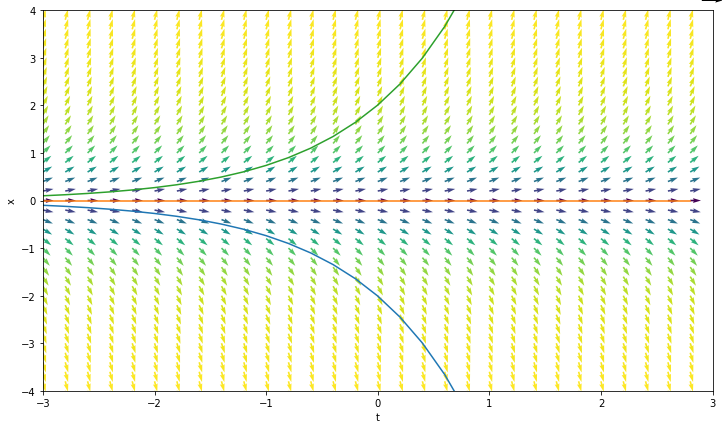

In [4]:
t_bounds = (-3, 3, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex1(1), [-0.1, 0, 0.1])

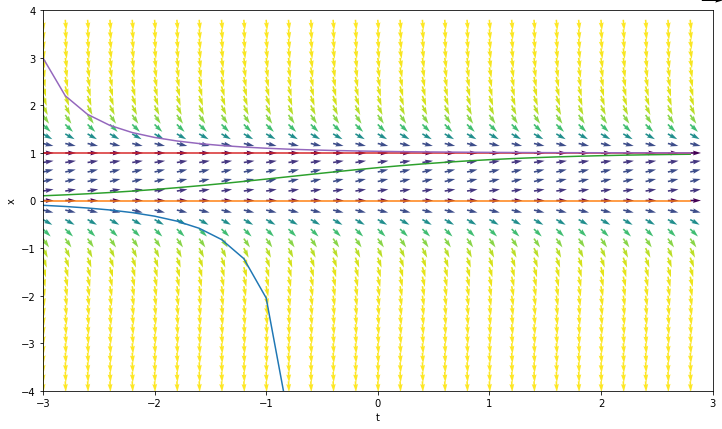

In [5]:
t_bounds = (-3, 3, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex2(1), [-0.1, 0, 0.1, 1, 3])

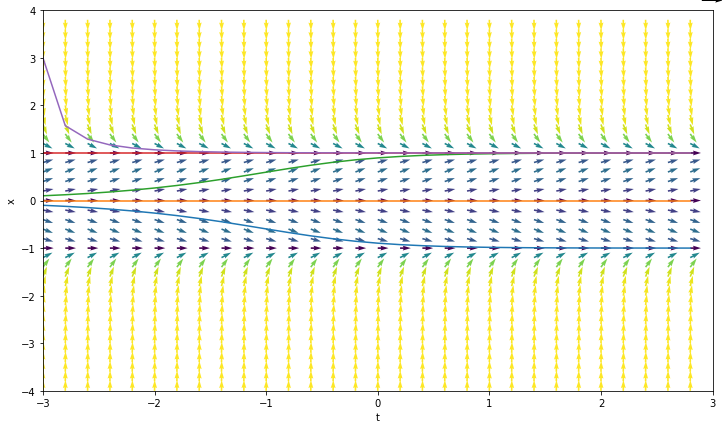

In [6]:
t_bounds = (-3, 3, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex3(), [-0.1, 0, 0.1, 1, 3])

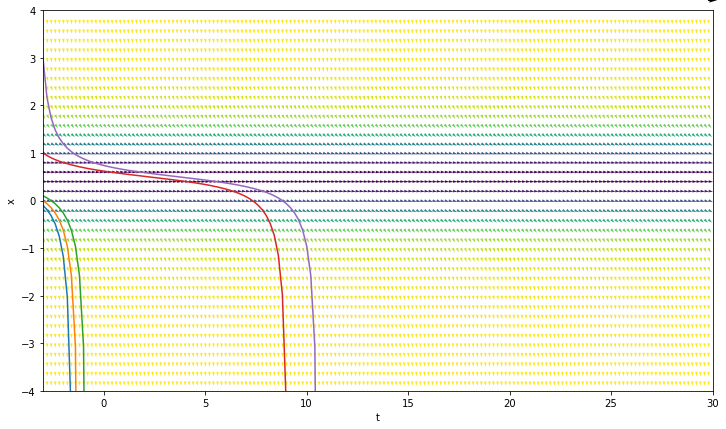

In [7]:
t_bounds = (-3, 30, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex4(1, 0.3), [-0.1, 0, 0.1, 1, 3])

For the next model, have a look at chapters 1.4-1.5 in Hirsch, Smale, Devaney book, to get a better grasp of how and why we can understand the solutions by knowing how they evolve in just the $[0,1]$ interval and, in fact, we really care only about the sequence $x_n = x(t+n)$.

The plot below is there to show you how the periodicity of the non-autonomous vector field appears in a qualitative plot.

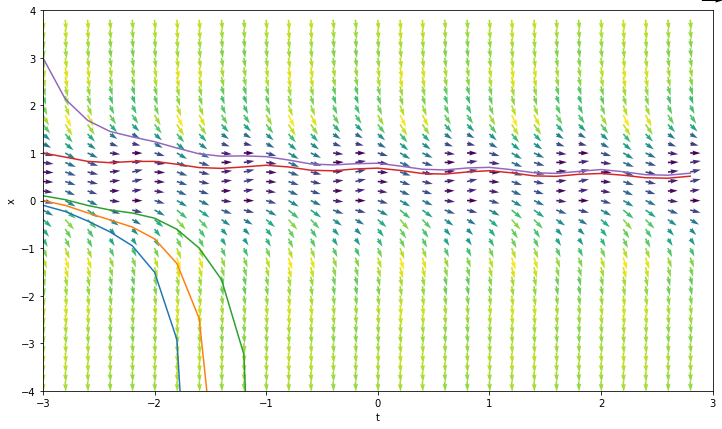

In [8]:
t_bounds = (-3, 3, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex5(1, 0.3), [-0.1, 0, 0.1, 1, 3])

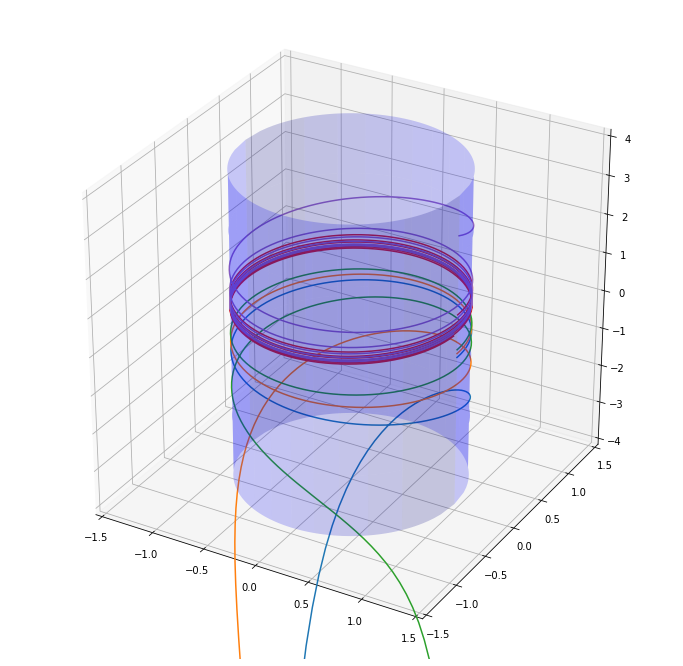

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Cylinder
x=np.linspace(-1, 1, 100)
z=np.linspace(-4, 4, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)

# Draw parameters
rstride = 20
cstride = 10
ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride, color='b')
ax.plot_surface(Xc, -Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride, color='b')

ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-4, 4)

t = np.arange(-3,3,0.01)
for iv in [-0.1, 0, 0.1, 1, 3]:
  y0 = np.array([iv])
  y0.reshape(1,)
  sol = solve_ivp(fun=ex5(1, 0.3), t_span=t_bounds[0:2], y0=y0, t_eval=t, dense_output=True)
  ax.plot(np.cos(2*np.pi*t), np.sin(2*np.pi*t), sol.sol(t)[0])

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-4, 4)

plt.show()

# A bifurcation in the constant harvesting model

$h=0.4$

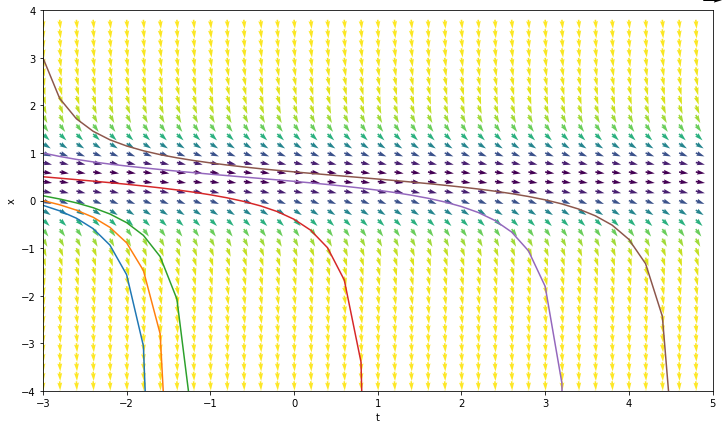

In [10]:
t_bounds = (-3, 5, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex4(1, 0.4), [-0.1, 0, 0.1, 0.5, 1, 3])

$h=0.25$

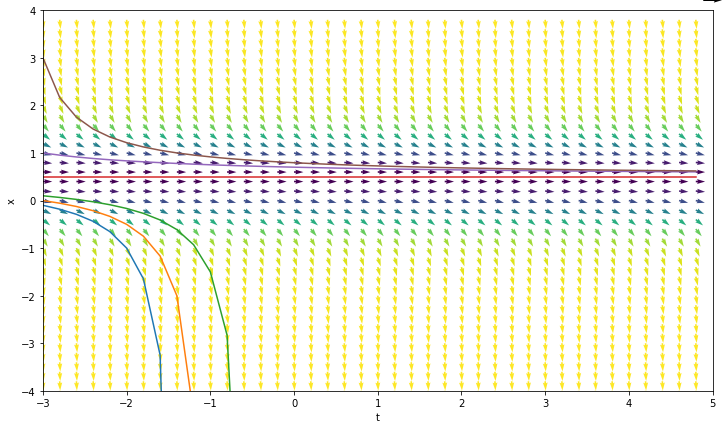

In [11]:
t_bounds = (-3, 5, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex4(1, 0.25), [-0.1, 0, 0.1, 0.5, 1, 3])

$h=0.1$

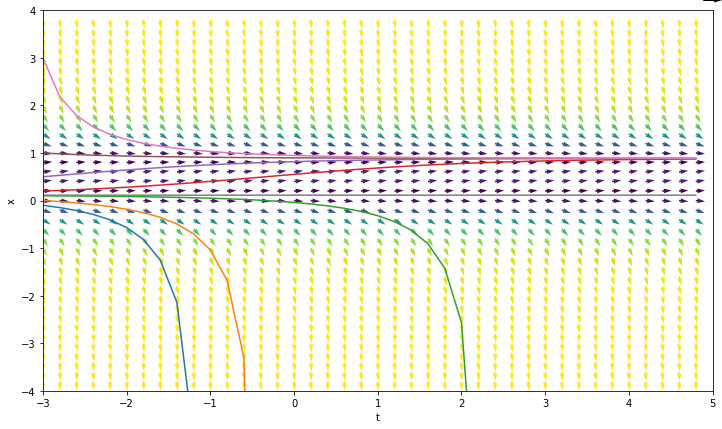

In [12]:
t_bounds = (-3, 5, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex4(1, 0.1), [-0.1, 0, 0.1, 0.2, 0.5, 1, 3, 0.11270])

To understand what is happening here, plot $f_h(x) = x(1-x) - h$ for different values of $h$ decreasing from $1$ to $0$. See e.g. https://www.desmos.com/calculator/4jzxi8nvan

You will see that for $h > 1/4$ there is no solution, at precisely $h=1/4$ we have an equilibrium solution for $x_0=0.5$ and for smaller values of $h$ this splits into $2$ distinct equilibrium solutions, producing the qualitative change of behaviour that you can see in the plots above.